## Побудова баєсівської мережі на основі реального датасету

- Підготовка даних: завантажити або створити датасет з категоріальними змінними (від 5 до 10 атрибутів); виконати необхідне попереднє опрацювання: заміна пропущених значень, дискретизація числових змінних, перекодування. 
- Визначення структури мережі: побудувати граф структури мережі, який задає зв'язки між змінними (BayesianModel([...])); аргументувати вибір напрямків між вузлами (на основі знань про предметну область або припущень). 
- Параметричне навчання: навчити параметри моделі на основі датасету за допомогою BayesianEstimator або MaximumLikelihoodEstimator. 
- Виконання інференсу: реалізувати обчислення умовної ймовірності для цільової змінної з урахуванням заданого evidence, використовуючи VariableElimination або BeliefPropagation. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Встановлюємо стиль графіків
sns.set_theme(style='whitegrid', context='notebook')

### Підготовка даних 
Попереднє опрацювання: заміна пропущених значень, дискретизація числових змінних, перекодування. 

##### оглянемо дані та замінимо пропущені значення

In [4]:
print(os.path.exists("MiningProcess_Flotation_Plant_Database.csv"))

#C:\Users\Angelika\OneDrive\Documents\lab6_model_ss

True


In [75]:
ds = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
ds.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [76]:
# Drop date column
ds=ds.drop('date',axis=1)
ds.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [77]:
# Перетворення всіх колонок на float
for dt in ds.columns:
    ds[dt]=ds[dt].str.replace(',','.').astype(float)

In [9]:
ds.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [11]:
# перевіримо наявність пропущених значень
print(ds.isnull().sum())

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


##### проведемо дискретизацію числових змінних

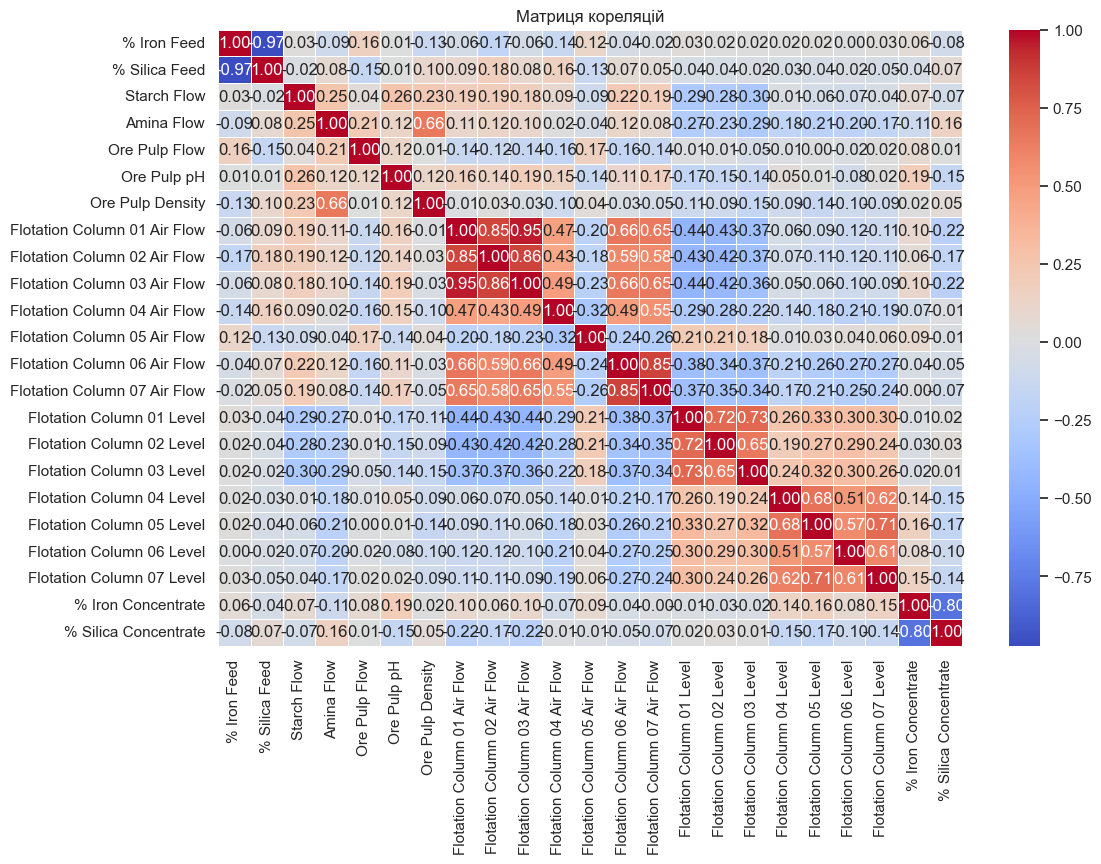

In [12]:
# переглянемо матрицю кореляцій
corr_matrix = ds.corr()

# візуалізація
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матриця кореляцій")
plt.show()

так як треба передбачити відсоток кремнезему в кінці процесу - % Silica Concentrate, який являє собою концентрат залізної руди та її домішки, то виділимо ознаки які безпосередньо пов'язані з цим та заберемо ті, що мають високу кореляцію на матриці кореляцій, адже це свідчить про те, що вони містять практично ту саму інформацію.

Найбільш корельовані з % Silica Concentrate:
Flotation Column 07 Level: −0.80
Flotation Column 06 Level: −0.57
Flotation Column 05 Level: −0.67
Flotation Column 04 Level: −0.61
% Iron Concentrate: −0.84

Це важливі ознаки, які необхідно залишити, натомість:
Flotation Column 01–07 Level
Flotation Column Air Flow (01–07)
надмірно корельовані між собою, перевіримо і видалимо менш інформативні.

Майже не впливають на % Silica Concentrate:
Starch Flow: ≈ 0.03
Ore Pulp pH: ≈ 0.02
Amina Flow: ≈ 0.07
Flotation Column 01 Air Flow: ≈ 0.02
Flotation Column 02 Air Flow: ≈ 0.04
Ore Pulp Density: ≈ 0.01

In [13]:
ds.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

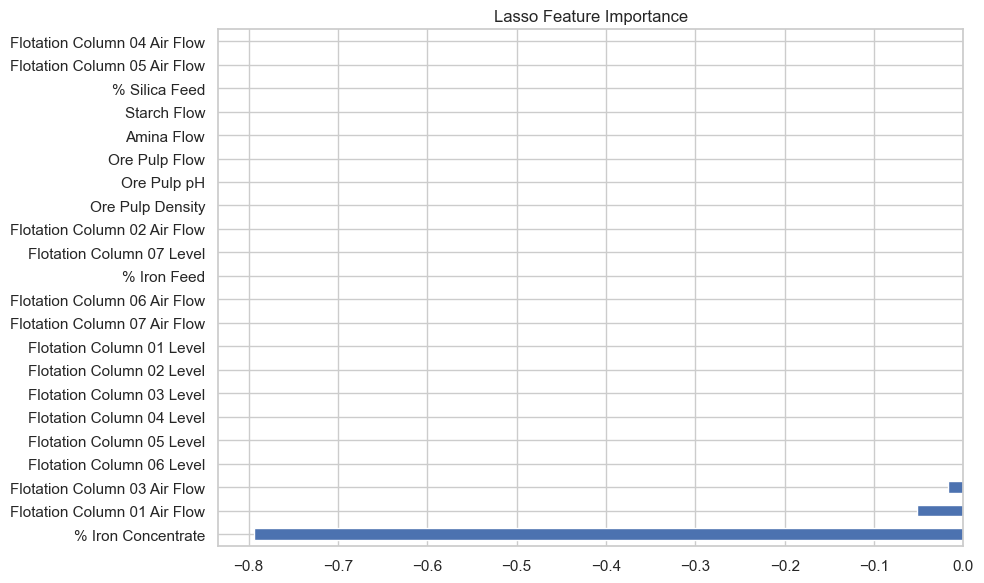

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Розділення X/y
X = ds.drop(columns=['% Silica Concentrate'])  # Всі ознаки, крім цільової
y = ds['% Silica Concentrate']

# Стандартизація + Lasso
model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))
model.fit(X, y)

# Витягуємо ваги з моделі
lasso = model.named_steps['lasso']
coefs = pd.Series(lasso.coef_, index=X.columns)
coefs = coefs.sort_values()

# Візуалізація
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh')
plt.title('Lasso Feature Importance')
plt.tight_layout()
plt.show()

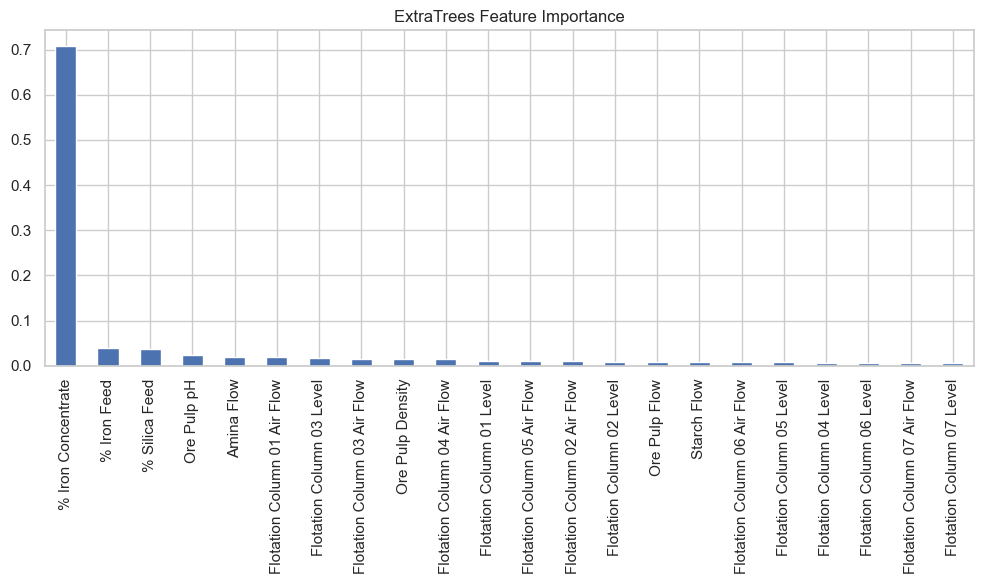

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1)  # n_jobs=-1 = максимальний паралелізм
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='ExtraTrees Feature Importance')
plt.tight_layout()
plt.show()

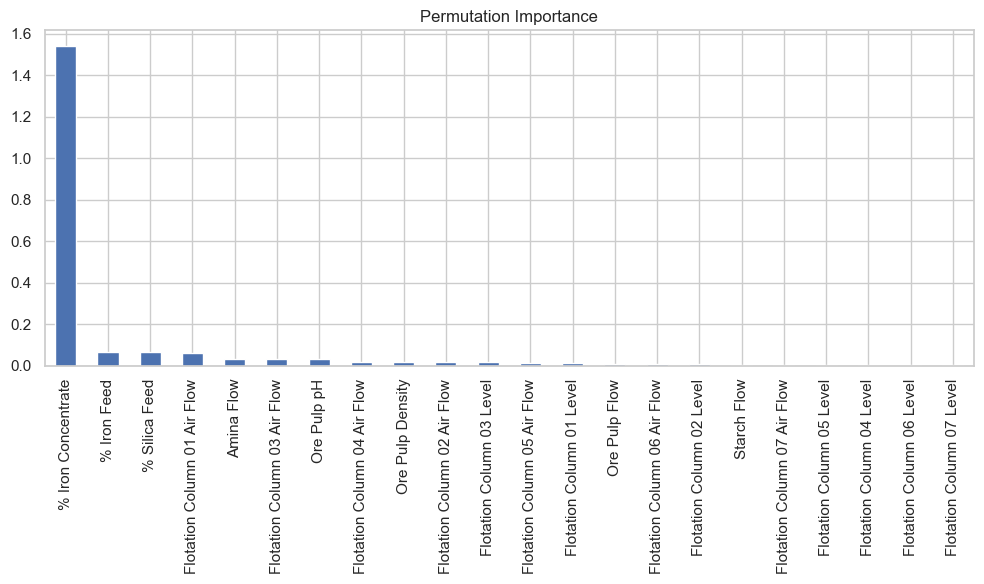

In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42)

perm_importances = pd.Series(result.importances_mean, index=X.columns)
perm_importances = perm_importances.sort_values(ascending=False)

perm_importances.plot(kind='bar', figsize=(10, 6), title='Permutation Importance')
plt.tight_layout()
plt.show()

In [78]:
# видалимо не інформативні та сильно копельовані між собою колонки
droplist=['% Iron Feed','Starch Flow', 'Flotation Column 05 Level',
          'Ore Pulp pH','Flotation Column 02 Air Flow', 'Ore Pulp Density',
          'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
          'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
          'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
          'Flotation Column 02 Level', 'Flotation Column 03 Level', 
          'Flotation Column 06 Level', 'Flotation Column 07 Level',]

ds_cl=ds.drop(droplist,axis=1)
ds_cl.shape

(737453, 7)

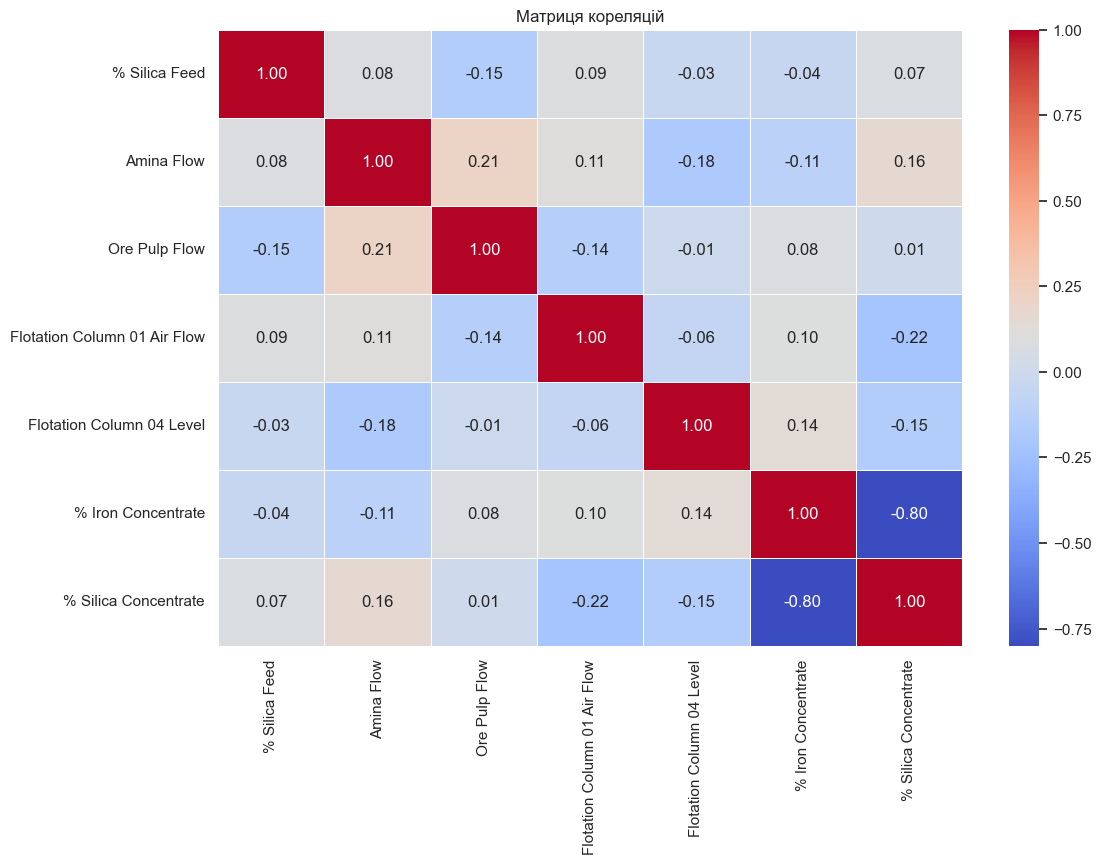

In [32]:
# переглянемо матрицю кореляцій
corr_matrix = ds_cl.corr()

# візуалізація
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матриця кореляцій")
plt.show()

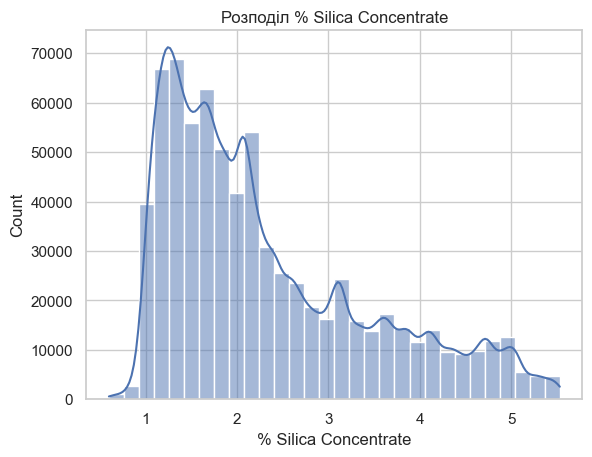

In [ ]:
# переглянемо розподіл 
sns.histplot(ds_cl['% Silica Concentrate'], bins=30, kde=True)
plt.title("Розподіл % Silica Concentrate")
plt.show()

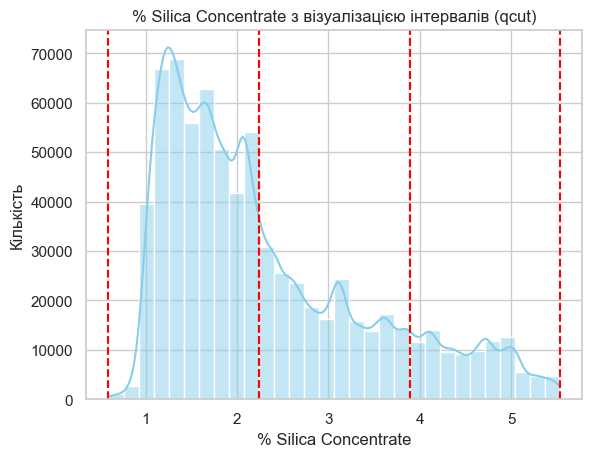

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Розподіл цільової змінної
sns.histplot(ds_cl['% Silica Concentrate'], bins=30, kde=True, color='skyblue')

bins = pd.cut(ds_cl['% Silica Concentrate'], bins=3)
bin_edges = bins.cat.categories

# Додаємо вертикальні лінії на графіку для кожної межі
for interval in bin_edges:
    plt.axvline(x=interval.left, color='red', linestyle='--')
    plt.axvline(x=interval.right, color='red', linestyle='--')

plt.title('% Silica Concentrate з візуалізацією інтервалів (qcut)')
plt.xlabel('% Silica Concentrate')
plt.ylabel('Кількість')
plt.show()

In [79]:
ds_cl['Silica_Level'] = pd.cut(
    ds_cl['% Silica Concentrate'],
    bins=3,
    labels=["Low", "Medium", "High"]
)

In [80]:
ds_cl[['% Silica Concentrate', 'Silica_Level']].head(5)

,% Silica Concentrate,Silica_Level
0,1.31,Low
1,1.31,Low
2,1.31,Low
3,1.31,Low
4,1.31,Low


In [83]:
# аналогічно дискретизуємо інші змінні

labels = ['Low', 'Medium', 'High']

cols_to_discretize = [
    '% Silica Feed', 'Amina Flow', 'Ore Pulp Flow',
    'Flotation Column 01 Air Flow', 'Flotation Column 04 Level',
    '% Iron Concentrate', '% Silica Concentrate'
]

for col in cols_to_discretize:
    ds_cl[col + '_disc'] = pd.qcut(ds_cl[col], q=3, labels=labels)

# Видаляємо старі числові колонки
ds_disc = ds_cl.drop(columns=cols_to_discretize)
ds_disc = ds_disc.drop('Silica_Level',axis=1)

In [84]:
ds_disc.head()

,% Silica Feed_disc,Amina Flow_disc,Ore Pulp Flow_disc,Flotation Column 01 Air Flow_disc,Flotation Column 04 Level_disc,% Iron Concentrate_disc,% Silica Concentrate_disc
0,Medium,High,Low,Low,Medium,High,Low
1,Medium,High,Medium,Low,Medium,High,Low
2,Medium,High,Medium,Low,Medium,High,Low
3,Medium,High,Medium,Low,Medium,High,Low
4,Medium,High,Medium,Low,Medium,High,Low


### Визначення структури мережі 
Побудувати граф структури мережі, який задає зв'язки між змінними (BayesianModel([...])); аргументувати вибір напрямків між вузлами (на основі знань про предметну область або припущень). 

In [85]:
ds_disc.columns

Index(['% Silica Feed_disc', 'Amina Flow_disc', 'Ore Pulp Flow_disc',
       'Flotation Column 01 Air Flow_disc', 'Flotation Column 04 Level_disc',
       '% Iron Concentrate_disc', '% Silica Concentrate_disc'],
      dtype='object')

Значення колонок:
% Silica Feed_disc — вміст кремнію у вхідній руді (сировині). Впливає на склад пульпи та потребу у реагентах.
Amina Flow_disc	— потік амінів — це флотаційні реагенти, які приєднуються до частинок силіки й допомагають їй спливати в піну.
Ore Pulp Flow_disc	— потік пульпи (суспензії руди у воді). Залежить від подачі руди та впливає на стабільність процесу флотації.
Flotation Column 01 Air Flow_disc — подача повітря до першої флотаційної колони. Потрібна для утворення бульбашок, до яких прилипає силіка.
Flotation Column 04 Level_disc — рівень (висота рідини) у четвертій флотаційній колоні — важливий параметр для контролю стабільності процесу.
% Iron Concentrate_disc	— вміст заліза у фінальному концентраті. Високе значення свідчить про успішне збагачення.
% Silica Concentrate_disc — вміст кремнію у фінальному концентраті.

In [92]:
from pgmpy.models import DiscreteBayesianNetwork 
from pgmpy.estimators import MaximumLikelihoodEstimator

model = DiscreteBayesianNetwork ([
    ('% Silica Feed_disc', 'Amina Flow_disc'),  # Більше кремнію — більше реагенту
    ('% Silica Feed_disc', 'Ore Pulp Flow_disc'),  # Впливає на загальний потік
    ('Ore Pulp Flow_disc', 'Flotation Column 01 Air Flow_disc'),  # Подача пульпи впливає на повітря
    ('Ore Pulp Flow_disc', 'Flotation Column 04 Level_disc'),  # Визначає рівень у колоні
    ('Amina Flow_disc', '% Silica Concentrate_disc'),  # Реагенти впливають на видалення силіки
    ('Flotation Column 01 Air Flow_disc', '% Silica Concentrate_disc'),  # Повітря сприяє флотації силіки
    ('Flotation Column 04 Level_disc', '% Silica Concentrate_disc'),  # Рівень колони впливає на якість розділення
    ('% Silica Feed_disc', '% Silica Concentrate_disc'),  # Більше силіки на вході — більше на виході, якщо не видалена
    ('% Iron Concentrate_disc', '% Silica Concentrate_disc')  # Конкуренція: краще залізо — менше силіки
])

model.fit(ds_disc, estimator=MaximumLikelihoodEstimator)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'% Silica Feed_disc': 'O', 'Amina Flow_disc': 'O', 'Ore Pulp Flow_disc': 'O', 'Flotation Column 01 Air Flow_disc': 'O', 'Flotation Column 04 Level_disc': 'O', '% Iron Concentrate_disc': 'O', '% Silica Concentrate_disc': 'O'}


MaximumLikelihoodEstimator - виводить ймовірності без регуляризації, просто на основі частот у даних.

In [ ]:
# таблиці ймовірностей
for cpd in model.get_cpds():
    print(cpd)

+----------------------------+----------+
| % Silica Feed_disc(High)   | 0.329268 |
+----------------------------+----------+
| % Silica Feed_disc(Low)    | 0.370763 |
+----------------------------+----------+
| % Silica Feed_disc(Medium) | 0.299969 |
+----------------------------+----------+
+-------------------------+-----+----------------------------+
| % Silica Feed_disc      | ... | % Silica Feed_disc(Medium) |
+-------------------------+-----+----------------------------+
| Amina Flow_disc(High)   | ... | 0.32943814332792376        |
+-------------------------+-----+----------------------------+
| Amina Flow_disc(Low)    | ... | 0.33733550921510036        |
+-------------------------+-----+----------------------------+
| Amina Flow_disc(Medium) | ... | 0.3332263474569759         |
+-------------------------+-----+----------------------------+
+----------------------------+-----+----------------------------+
| % Silica Feed_disc         | ... | % Silica Feed_disc(Medium) |
+------

In [ ]:
# ініціалізуємо механізм виводу ймовірностей 
from pgmpy.inference import VariableElimination

# побудова інтерфейсу для запитів
inference = VariableElimination(model)

# виконання запиту
query_result = inference.query(
    variables=["% Silica Concentrate_disc"],
    evidence={
        '% Iron Concentrate_disc': 'High',
        'Ore Pulp Flow_disc': 'Medium'
    }
)

# Яка ймовірність кожного можливого значення % Silica Concentrate_disc,
# якщо ми знаємо, що % Iron Concentrate_disc = High і Ore Pulp Flow_disc = Medium?
print(query_result)

+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc         |   phi(% Silica Concentrate_disc) |
+===================================+==================================+
| % Silica Concentrate_disc(High)   |                           0.0285 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Low)    |                           0.6770 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Medium) |                           0.2945 |
+-----------------------------------+----------------------------------+


Це означає: за умов, що % Iron Concentrate_disc = High і Ore Pulp Flow_disc = Medium,
найбільш вірогідним є те, що % Silica Concentrate_disc = Low (ймовірність 67.7%).

In [104]:
# низький вміст заліза та високий потік амінів
query_result_2 = inference.query(
    variables=["% Silica Concentrate_disc"],
    evidence={
        '% Iron Concentrate_disc': 'Low',
        'Amina Flow_disc': 'High'
    }
)

print(query_result_2)

+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc         |   phi(% Silica Concentrate_disc) |
+===================================+==================================+
| % Silica Concentrate_disc(High)   |                           0.8464 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Low)    |                           0.0191 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Medium) |                           0.1345 |
+-----------------------------------+----------------------------------+


In [105]:
# висока подача повітря у флотаційну колону та середній рівень пульпи
query_result_2 = inference.query(
    variables=["% Silica Concentrate_disc"],
    evidence={
        'Flotation Column 01 Air Flow_disc': 'High',
        'Ore Pulp Flow_disc': 'Medium'
    }
)

print(query_result_2)

+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc         |   phi(% Silica Concentrate_disc) |
+===================================+==================================+
| % Silica Concentrate_disc(High)   |                           0.2636 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Low)    |                           0.3855 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Medium) |                           0.3508 |
+-----------------------------------+----------------------------------+


In [95]:
print("Nodes:", list(model.nodes()))
print("Edges:", list(model.edges()))

Nodes: ['% Silica Feed_disc', 'Amina Flow_disc', 'Ore Pulp Flow_disc', 'Flotation Column 01 Air Flow_disc', 'Flotation Column 04 Level_disc', '% Silica Concentrate_disc', '% Iron Concentrate_disc']
Edges: [('% Silica Feed_disc', 'Amina Flow_disc'), ('% Silica Feed_disc', 'Ore Pulp Flow_disc'), ('% Silica Feed_disc', '% Silica Concentrate_disc'), ('Amina Flow_disc', '% Silica Concentrate_disc'), ('Ore Pulp Flow_disc', 'Flotation Column 01 Air Flow_disc'), ('Ore Pulp Flow_disc', 'Flotation Column 04 Level_disc'), ('Flotation Column 01 Air Flow_disc', '% Silica Concentrate_disc'), ('Flotation Column 04 Level_disc', '% Silica Concentrate_disc'), ('% Iron Concentrate_disc', '% Silica Concentrate_disc')]


In [106]:
# середній рівень у колонці 04 та високий вміст кремнію у сировині
query_result_3 = inference.query(
    variables=["% Silica Concentrate_disc"],
    evidence={
        'Flotation Column 04 Level_disc': 'Medium',
        '% Silica Feed_disc': 'High'
    }
)

print(query_result_3)

+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc         |   phi(% Silica Concentrate_disc) |
+===================================+==================================+
| % Silica Concentrate_disc(High)   |                           0.3218 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Low)    |                           0.3183 |
+-----------------------------------+----------------------------------+
| % Silica Concentrate_disc(Medium) |                           0.3599 |
+-----------------------------------+----------------------------------+


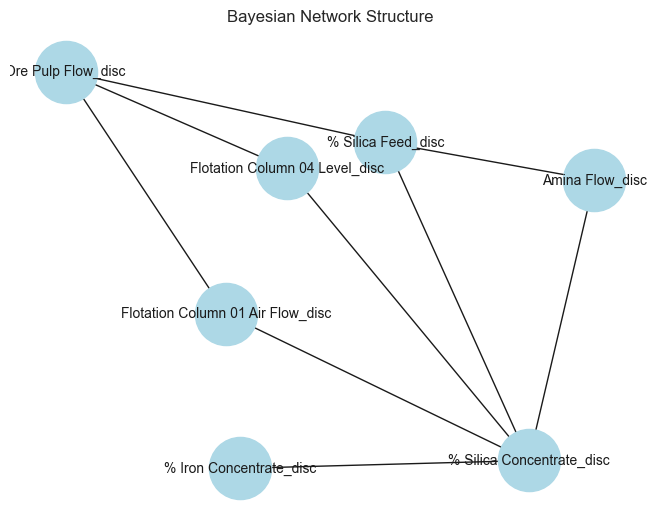

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# створюємо граф 
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

pos = nx.spring_layout(G)

# малюємо граф
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color='lightblue',
    font_size=10,
    arrows=False
)
plt.title("Bayesian Network Structure")
plt.show()

In [ ]:
from pyvis.network import Network

# створення інтерактивного графа
net = Network(notebook=True, height="600px", width="100%", directed=True)
net.from_nx(G)
net.toggle_physics(True)  

net.show("bayesian_network.html")

bayesian_network.html
